In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.colors import ListedColormap, BoundaryNorm

In [26]:
fontsize = 14
plt.rcParams.update({
    "font.size": fontsize
})

# Method Comparison + Phase Diagram

In [27]:
def take_data(file_name):

    df = pd.read_csv(file_name)

    ks = df['ks'].to_numpy()
    hs = df['hs'].to_numpy()
    E_ED = df['E_ED'].to_numpy()
    E_ED = np.array(E_ED, dtype=complex)
    E_nk = df['E_nk'].to_numpy()
    E_nk = np.array(E_nk, dtype=complex)
    E_exact = df['E_exact'].to_numpy()
    E_exact = np.array(E_exact, dtype=complex)
    F_exact = df['F_exact'].to_numpy()
    F_exact = np.array(F_exact, dtype=complex)
    F_nk = df['F_nk'].to_numpy()
    F_nk = np.array(F_nk, dtype=complex)

    mask = (E_ED.imag * E_nk.imag < 0)
    E_ED = np.where(mask, E_ED.conj(), E_ED)

    mask = (E_exact.imag * E_ED.imag < 0)
    E_exact = np.where(mask, E_exact.conj(), E_exact)

    relative_error_nk = np.abs(E_ED - E_nk) / np.abs(E_ED)
    relative_error_exact = np.abs(E_ED - E_exact) / np.abs(E_ED)

    sort_indices = np.lexsort((ks, hs)) 

    ks = ks[sort_indices]
    hs = hs[sort_indices]
    E_ED = E_ED[sort_indices]
    E_nk = E_nk[sort_indices]
    E_exact = E_exact[sort_indices]
    F_exact = F_exact[sort_indices]
    F_nk = F_nk[sort_indices]

    mask = (E_ED.imag * E_nk.imag < 0)
    E_ED = np.where(mask, E_ED.conj(), E_ED)

    mask = (E_exact.imag * E_ED.imag < 0)
    E_exact = np.where(mask, E_exact.conj(), E_exact)

    relative_error_nk = np.abs(E_ED - E_nk) / np.abs(E_ED)
    relative_error_exact = np.abs(E_ED - E_exact) / np.abs(E_ED)

    return relative_error_nk, relative_error_exact, ks, hs

def take_stats(data):
    return np.mean(data), np.median(data), np.std(data)

In [28]:
lam = 0.5
L = 9

file_name = "../Data/phase_diagram/lam_" + str(lam) + "_L_" + str(9) + ".csv"
df = pd.read_csv(file_name)

ks_all = df['k'].unique()
hs_all = df['h'].unique()
E_all = df.pivot(index = 'h', columns = 'k', values = 'E').values

folder = f"../Data/fixed_points_test/cRBM_lam_{lam}_L_{L}"

re_nk_SC, re_exact_SC, ks, hs = take_data(folder + "_AllSR_4000_z.csv")
re_nk_par, re_exact_par, _, _ = take_data(folder + "_AllSR_par_4000.csv")
re_nk_CC, re_exact_CC, _, _ = take_data(folder + "_CC_4000.csv")

re_nk_SC_mean, re_nk_SC_mean, re_nk_SC_std = take_stats(re_nk_SC)
re_nk_CC_mean, re_nk_CC_mean, re_nk_CC_std = take_stats(re_nk_CC)
re_nk_par_mean, re_nk_par_mean, re_nk_par_std = take_stats(re_nk_par)

re_exact_SC_mean, re_exact_SC_mean, re_exact_SC_std = take_stats(re_exact_SC)
re_exact_CC_mean, re_exact_CC_mean, re_exact_CC_std = take_stats(re_exact_CC)
re_exact_par_mean, re_exact_par_mean, re_exact_par_std = take_stats(re_exact_par)

re_nk_SC_grid = re_nk_SC.reshape((11, 11))
re_nk_CC_grid = re_nk_CC.reshape((11, 11))
re_nk_par_grid = re_nk_par.reshape((11, 11))

re_exact_SC_grid = re_exact_SC.reshape((11, 11))
re_exact_CC_grid = re_exact_CC.reshape((11, 11))
re_exact_par_grid = re_exact_par.reshape((11, 11))

df = pd.read_csv(folder + "_CC_4000.csv")

ks = df['ks'].to_numpy()
hs = df['hs'].to_numpy()
E_nk = df['E_nk'].to_numpy()
E_nk = np.array(E_nk, dtype=complex)


sort_indices = np.lexsort((ks, hs)) 

ks = ks[sort_indices]
hs = hs[sort_indices]
E_nk = E_nk[sort_indices]

from scipy.interpolate import make_interp_spline

file_name = "../Data/phase_diagram/EP_line_9.csv"
df = pd.read_csv(file_name)
ks_EP = df["ks"].to_numpy(dtype = float)
hs_EP = df["hs"].to_numpy(dtype = float)

unique_ks, unique_indices = np.unique(ks_EP, return_index=True)
unique_hs = hs_EP[unique_indices]

spline = make_interp_spline(unique_ks, unique_hs, k=3)

ks_smooth = np.linspace(unique_ks.min(), unique_ks.max(), 300)
hs_smooth = spline(ks_smooth)

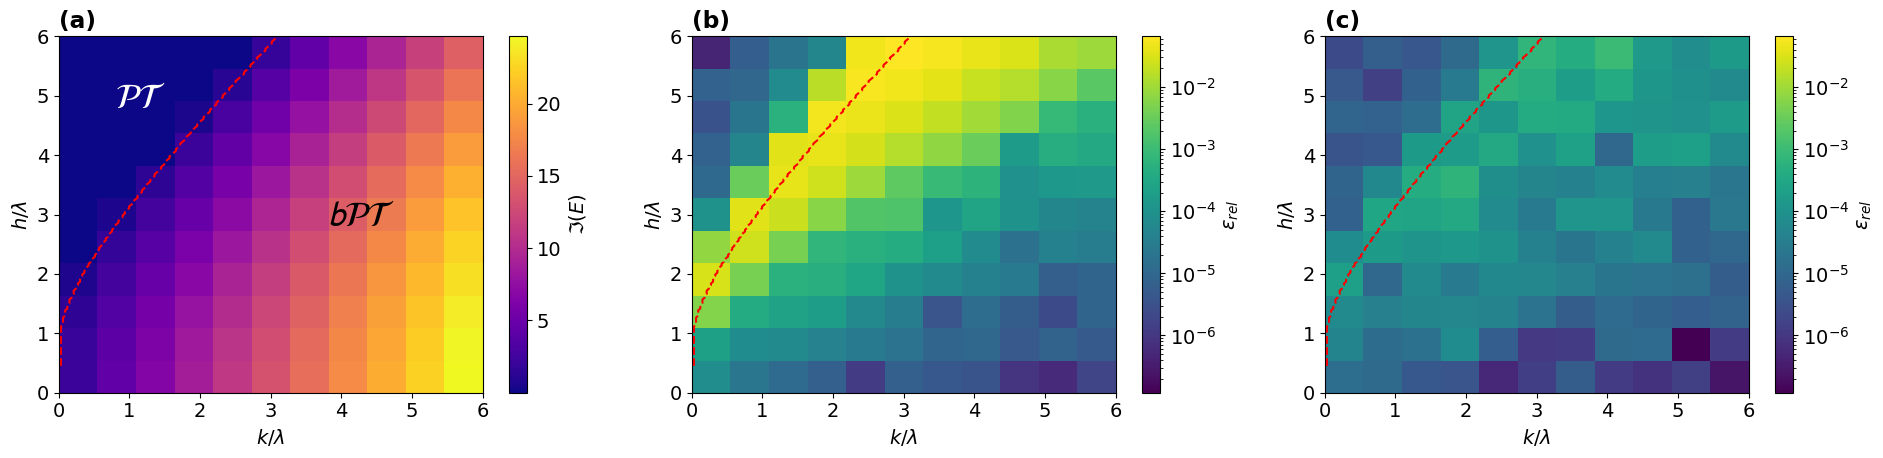

In [29]:
E_nk_im_grid = E_nk.reshape((11, 11)).imag
col_titles = ["Self-Consistent Method", r"Self-Consistent Method", "Energy as a Parameter Method"]
grids = [
    [re_nk_SC_grid, re_nk_CC_grid, re_nk_par_grid],  
    [re_exact_SC_grid, re_exact_CC_grid, re_exact_par_grid]  
]
all_data = [re_nk_CC_grid, re_nk_par_grid]
vmin = min(np.min(grid) for grid in all_data)
vmax = max(np.max(grid) for grid in all_data)

fig, axes = plt.subplots(1, 3, figsize=(6.4 * 3, 4.8))

ax = axes[0]
im0 = ax.imshow(
    np.abs(E_nk_im_grid),
    extent=[ks_all[0] / 0.5, ks_all[-1] / 0.5, hs_all[0] / 0.5, hs_all[-1] / 0.5],
    origin='lower',
    aspect='auto',
    cmap='plasma' 
)
cbar0 = fig.colorbar(im0, ax=ax)
cbar0.set_label(r"$\Im(E)$", fontsize=fontsize)
cbar0.ax.tick_params(labelsize=fontsize)

ax.plot((ks_EP / 0.5)[15:], (hs_EP / 0.5)[15:], color="red", linestyle="--")
ax.text(0.4 / 0.5, 2.4 / 0.5, r"$\mathcal{PT}$", fontsize=25, color='white')
ax.text(1.9 / 0.5, 1.4 / 0.5, r"$\mathcal{bPT}$", fontsize=25, color='black')
ax.set_xlabel(r"$k/\lambda$")
ax.set_ylabel(r"$h/\lambda$")
ax.set_title("(a)", loc="left", fontweight="bold")

col_indices = [2, 1]  

for plot_idx, col in enumerate(col_indices, start=1):
    ax = axes[plot_idx]
    imshow_obj = ax.imshow(
        grids[0][col],
        cmap='viridis',
        origin='lower',
        aspect='auto',
        extent=[ks_all[0] / 0.5, ks_all[-1] / 0.5, hs_all[0] / 0.5, hs_all[-1] / 0.5],
        norm=LogNorm(vmin=vmin, vmax=vmax)
    )
    ax.set_xlabel(r"$k/\lambda$")
    ax.set_ylabel(r"$h/\lambda$")
    cbar = fig.colorbar(imshow_obj, ax=ax)
    cbar.ax.tick_params(labelsize=fontsize)
    cbar.set_label(r"$\epsilon_{rel}$", fontsize=fontsize)
    ax.plot((ks_EP / 0.5)[15:], (hs_EP / 0.5)[15:], color="red", linestyle="--")
    ax.set_title(f"({chr(ord('a') + plot_idx)})", loc="left", fontweight="bold")

plt.tight_layout()
plt.savefig("Figures/method_comparison.pdf")

# Around EP

In [30]:
L = 20
lam = 0.5

file_name_rev = f"../Data/warm_start_CC/plot_observables/MC_cRBM_lam_{lam}_L_{L}_PBC_1_dim_rev.csv"
file_name = f"../Data/warm_start_CC/plot_observables/MC_cRBM_lam_{lam}_L_{L}_PBC_1_dim.csv"
df = pd.read_csv(file_name)
df_rev = pd.read_csv(file_name_rev)

hs_array = df["hs"].to_numpy(dtype=float)
seen = set()
unique_hs = [h for h in hs_array if not (h in seen or seen.add(h))]


grouped_data = {}
for h in unique_hs:
    mask = df["hs"] == h
    grouped_data[h] = {
        "ks": df.loc[mask, "ks"].to_numpy(dtype=float),
        "E_ED": df.loc[mask, "Gs_exact"].to_numpy(dtype=complex),
        "E_warm": df.loc[mask, "E_estimate"].to_numpy(dtype=complex),
        "re": df.loc[mask, "re_E"].to_numpy(dtype=float),
        "M_z_exact": df.loc[mask, "M_z_exact"].to_numpy(dtype=float),
        "M_z_estimate": df.loc[mask, "M_z_estimate"].to_numpy(dtype=float),
        "M_x_exact": df.loc[mask, "M_x_exact"].to_numpy(dtype=float),
        "M_x_estimate": df.loc[mask, "M_x_estimate"].to_numpy(dtype=float),
    }

h = 1.5
sort_idx = np.argsort(grouped_data[h]["ks"])
for key in grouped_data[h]:
    grouped_data[h][key] = grouped_data[h][key][sort_idx]

ks_to_remove = np.linspace(0, 0.6, 20)[13:]
ks = grouped_data[h]["ks"]
mask = ~np.any(np.isclose(ks[:, None], ks_to_remove[None, :]), axis=1)
for key in grouped_data[h]:
    grouped_data[h][key] = grouped_data[h][key][mask]

df_rev = df_rev.sort_values(by = "ks")

k_values_to_remove = np.linspace(0, 0.6, 20)[14:-1]
ks_array = df_rev['ks'].to_numpy(dtype=float)
remove_mask = np.any(np.isclose(ks_array[:, None], k_values_to_remove[None, :], atol=1e-8), axis=1)
df_rev = df_rev[~remove_mask]

df_rev["ks_rounded"] = df_rev["ks"].round(5)
df_rev = df_rev.drop_duplicates(subset="ks_rounded", keep="first")
df_rev = df_rev.drop(columns="ks_rounded")

ks_rev = df_rev["ks"].to_numpy(dtype = float)
re_rev = df_rev["re_E"].to_numpy(dtype = float)
E_ED_rev = df_rev["Gs_exact"].to_numpy(dtype = complex)
E_estimate_rev = df_rev["E_estimate"].to_numpy(dtype = complex)

mask = (E_ED_rev.imag * E_estimate_rev.imag < 0)
E_ED_rev = np.where(mask, E_ED_rev.conj(), E_ED_rev)
re_rev = np.abs(E_ED_rev - E_estimate_rev) / np.abs(E_ED_rev)

L = 20
lam = 0.5

file_name = f"../Data/fixed_start_CC/plot_observables/MC_cRBM_lam_{lam}_L_{L}_PBC_1_dim.csv"
df = pd.read_csv(file_name)

hs_array = df["hs"].to_numpy(dtype=float)
seen = set()
unique_hs = [h for h in hs_array if not (h in seen or seen.add(h))]

df = df.sort_values(by = "ks")
ks_fixed = df['ks'].to_numpy(dtype=float)

ks_fixed = df["ks"].to_numpy(dtype = float)
re_fixed = df["re_E"].to_numpy(dtype = float)
E_ED_fixed = df["Gs_exact"].to_numpy(dtype = complex)
E_estimate_fixed = df["E_estimate"].to_numpy(dtype = complex)

mask = (E_ED_fixed.imag * E_estimate_fixed.imag < 0)
E_ED_fixed = np.where(mask, E_ED_fixed.conj(), E_ED_fixed)
re_fixed = np.abs(E_ED_fixed - E_estimate_fixed) / np.abs(E_ED_fixed)

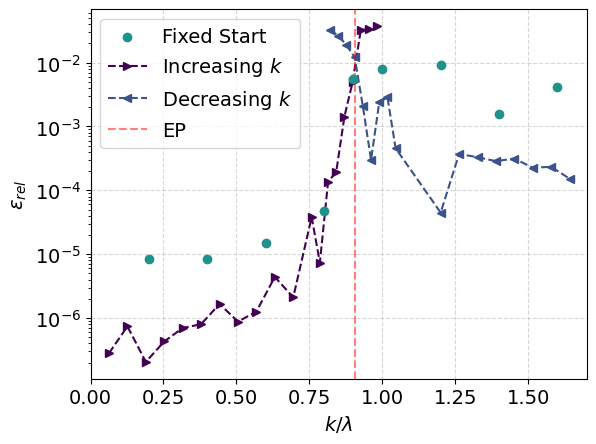

In [31]:
k_EP = 0.45263157894736844

colors = plt.cm.viridis(np.linspace(0, 0.5, 3))  
ks = grouped_data[1.5]["ks"]
re = grouped_data[1.5]["re"]

plt.scatter(ks_fixed/0.5, re_fixed, color=colors[2], label=r"Fixed Start", zorder=5)
plt.plot(ks/0.5, re, linestyle="--", marker=">", color=colors[0], label=r"Increasing $k$")
plt.plot(ks_rev/0.5, re_rev, linestyle="--", marker="<", color=colors[1], label=r"Decreasing $k$")

plt.axvline(x=k_EP/0.5, color='red', linestyle='--', alpha = 0.5, label="EP")
plt.gca().get_xticklabels()[-1].set_color('red')  

plt.legend(loc="upper left")
plt.xlabel(r"$k/\lambda$", fontsize=fontsize)
plt.ylabel(r"$\epsilon_{rel}$", fontsize=fontsize)
plt.yscale("log")
plt.grid(linestyle="--", alpha = 0.5)
plt.xlim(0/0.5, 0.85/0.5)

plt.savefig("Figures/around_EP.pdf")
plt.show()

In [32]:
def plot_around_EP(ax, fontsize=fontsize):
    k_EP = 0.45263157894736844
    colors = plt.cm.viridis(np.linspace(0, 0.5, 3))  
    ks = grouped_data[1.5]["ks"]
    re = grouped_data[1.5]["re"]

    ax.scatter(ks_fixed / 0.5, re_fixed, color=colors[2], label=r"Fixed Start", zorder=5)
    ax.plot(ks / 0.5, re, linestyle="--", marker=">", color=colors[0], label=r"Increasing $k$")
    ax.plot(ks_rev / 0.5, re_rev, linestyle="--", marker="<", color=colors[1], label=r"Decreasing $k$")
    ax.axvline(x=k_EP / 0.5, color='red', linestyle='--', alpha=0.5, label="EP")

    ax.set_xlabel(r"$k/\lambda$", fontsize=fontsize)
    ax.set_ylabel(r"$\epsilon_{rel}$", fontsize=fontsize)
    ax.set_yscale("log")
    ax.set_xlim(0, 0.85 / 0.5)
    ax.grid(linestyle="--", alpha=0.5)
    ax.legend(loc="upper left", fontsize=fontsize - 1)


# Warm Start 6x6 + Magnetization

In [33]:
lam = 0.5
n_dim = 2
L = 6
hs = [2, 2.25]
OBC = "PBC"

M_x_estimate = []
M_z_estimate = []
M_x_LR_estimate = []
M_z_LR_estimate = []
M_x_DMRG = []
M_z_DMRG = []
E_warm = []
es_dmrg = []
re = []

for h in hs:
    file_name = f"../Data/warm_start_CC/plot_observables/MC_cRBM_lam_{lam}_L_{L}_{OBC}_{n_dim}_dim.csv"
    df = pd.read_csv(file_name)
    df = df[df['hs'] == h]
    ks = df["ks"].to_numpy(dtype=float)
    E_warm.append(df["E_estimate"].to_numpy(dtype=complex))
    M_z_estimate.append(df["M_z_estimate"].to_numpy(dtype=float))
    M_x_estimate.append(df["M_x_estimate"].to_numpy(dtype=float))
    M_z_LR_estimate.append(df["M_z_LR_estimate"].to_numpy(dtype=complex))
    M_x_LR_estimate.append(df["M_x_LR_estimate"].to_numpy(dtype=complex))

    df = pd.read_csv(f"../Data/DMRG/line/lam_{lam}_N_{L}_PBC_true_obs.csv")
    df = df[df['h'] == h]
    df = df.sort_values(by="k")
    M_x_DMRG.append(df["magx"].to_numpy(dtype=float))
    M_z_DMRG.append(df["magz"].to_numpy(dtype=float))
    e_dmrg = df["energy"].apply(lambda z: str(z).replace("im", "j").replace(" ", "")).to_numpy(dtype=complex)
    mask = (e_dmrg.imag * E_warm[-1].imag < 0)
    es_dmrg.append(np.where(mask, e_dmrg.conj(), e_dmrg))
    re.append(np.abs(es_dmrg[-1] - E_warm[-1]) / np.abs(es_dmrg[-1]))

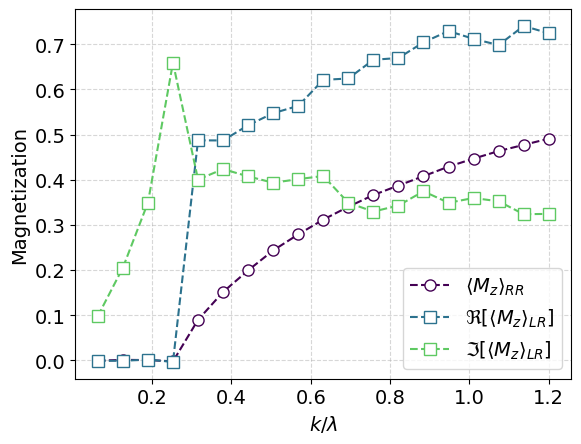

In [34]:
which = 0
colors = plt.cm.viridis(np.linspace(0, 0.75, 3))
markers = ["o", "s", "s"]
ks_rescaled = ks / 0.5

plt.plot(ks_rescaled, M_z_estimate[which], label=r"$\langle M_z\rangle_{RR}$", linestyle="--", marker=markers[0], color=colors[0],
               markerfacecolor='white', markersize=8)
plt.plot(ks_rescaled, np.real(M_z_LR_estimate[which]), label=r"$\Re\left[\langle M_z\rangle_{LR}\right]$", linestyle="--", marker=markers[1], color=colors[1],
               markerfacecolor='white', markersize=8)
plt.plot(ks_rescaled, np.abs(np.imag(M_z_LR_estimate[which])), label=r"$\Im\left[\langle M_z\rangle_{LR}\right]$", linestyle="--", marker=markers[2], color=colors[2],
               markerfacecolor='white', markersize=8)

plt.legend()
plt.xlabel(r"$k/\lambda$", fontsize=fontsize)
plt.ylabel(r"Magnetization", fontsize=fontsize)
plt.grid(linestyle="--", alpha=0.5)

plt.savefig("Figures/m_z.pdf")
plt.show()

In [35]:
def plot_magnetization_components(ax, ks_rescaled, M_z_estimate, M_z_LR_estimate, which=0, fontsize=fontsize):
    colors = plt.cm.viridis(np.linspace(0, 0.75, 3))
    markers = ["o", "s", "s"]

    ax.plot(ks_rescaled, M_z_estimate[which],
            label=r"$\langle M_z\rangle_{RR}$", linestyle="--",
            marker=markers[0], color=colors[0],
            markerfacecolor='white', markersize=8)

    ax.plot(ks_rescaled, np.real(M_z_LR_estimate[which]),
            label=r"$\Re\left[\langle M_z\rangle_{LR}\right]$", linestyle="--",
            marker=markers[1], color=colors[1],
            markerfacecolor='white', markersize=8)

    ax.plot(ks_rescaled, np.abs(np.imag(M_z_LR_estimate[which])),
            label=r"$\Im\left[\langle M_z\rangle_{LR}\right]$", linestyle="--",
            marker=markers[2], color=colors[2],
            markerfacecolor='white', markersize=8)

    ax.set_xlabel(r"$k/\lambda$", fontsize=fontsize)
    ax.set_ylabel("Magnetization", fontsize=fontsize)
    ax.grid(linestyle="--", alpha=0.5)
    ax.legend(fontsize=fontsize - 1)


/tmp/ipykernel_13721/439788474.py:86: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


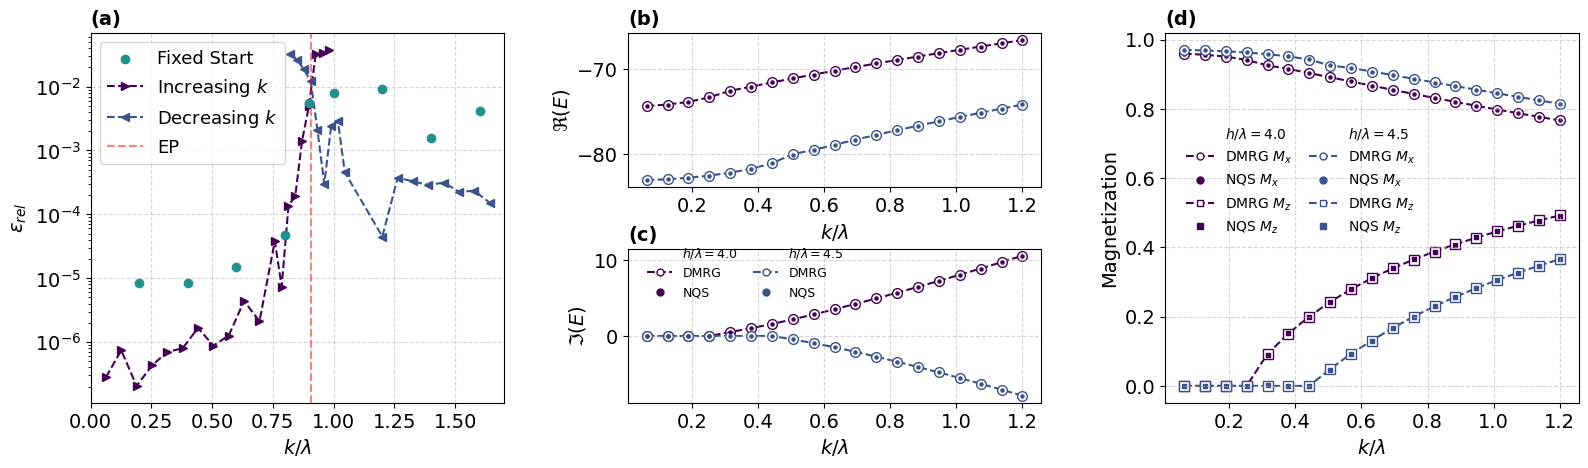

In [36]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import numpy as np

colors = plt.cm.viridis(np.linspace(0, 0.75, len(hs) + 2))
ks_rescaled = ks / 0.5

fig = plt.figure(figsize=(6.4 * 3, 4.8)) 
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1], wspace=0.3, hspace=0.4)

ax_EP = fig.add_subplot(gs[:, 0])    
ax_re = fig.add_subplot(gs[0, 1])    
ax_im = fig.add_subplot(gs[1, 1])    
ax_mag = fig.add_subplot(gs[:, 2])   

plot_around_EP(ax_EP, fontsize=fontsize)
ax_EP.set_title("(a)", loc="left", fontsize=fontsize, fontweight="bold")

for i, h in enumerate(hs):
    color = colors[i]
    ax_re.plot(ks_rescaled, es_dmrg[i].real, linestyle="--", marker="o",
               markerfacecolor='white', markersize=7, color=color, zorder=1)
    ax_re.scatter(ks_rescaled, E_warm[i].real, marker="o", s=5, color=color, zorder=2)
    ax_im.plot(ks_rescaled, es_dmrg[i].imag, linestyle="--", marker="o",
               markerfacecolor='white', markersize=7, color=color, zorder=1)
    ax_im.scatter(ks_rescaled, E_warm[i].imag, marker="o", s=5, color=color, zorder=2)
    ax_mag.plot(ks_rescaled, np.abs(M_x_DMRG[i]), linestyle="--", marker="o",
                markerfacecolor='white', markersize=7, color=color, zorder=1, label="DMRG $M_x$")
    ax_mag.plot(ks_rescaled, np.abs(M_z_DMRG[i]), linestyle="--", marker="s",
                markerfacecolor='white', markersize=7, color=color, zorder=1, label="DMRG $M_z$")
    
    ax_mag.scatter(ks_rescaled, np.abs(M_x_estimate[i]), marker="o", s=5, color=color, label="NQS $M_x$")
    ax_mag.scatter(ks_rescaled, np.abs(M_z_estimate[i]), marker="s", s=5, color=color, label="NQS $M_z$")

for ax in [ax_re, ax_im, ax_mag]:
    ax.set_xlabel(r"$k/\lambda$", fontsize=fontsize)
    ax.tick_params(labelsize=fontsize)
    ax.grid(linestyle="--", alpha=0.5)

ax_re.set_ylabel(r"$\Re(E)$", fontsize=fontsize)
ax_im.set_ylabel(r"$\Im(E)$", fontsize=fontsize)
ax_mag.set_ylabel("Magnetization", fontsize=fontsize)

ax_re.set_title("(b)", loc="left", fontsize=fontsize, fontweight="bold")
ax_im.set_title("(c)", loc="left", fontsize=fontsize, fontweight="bold")
ax_mag.set_title("(d)", loc="left", fontsize=fontsize, fontweight="bold")

mag_handles, mag_labels = [], []
for i, h in enumerate(hs):
    color = colors[i]
    mag_handles.extend([
        plt.Line2D([], [], linestyle="None"),
        plt.Line2D([], [], linestyle="--", marker="o", color=color, markerfacecolor='white', markersize=5),
        plt.Line2D([], [], linestyle="None", marker="o", color=color, markersize=5),
        plt.Line2D([], [], linestyle="--", marker="s", color=color, markerfacecolor='white', markersize=5),
        plt.Line2D([], [], linestyle="None", marker="s", color=color, markersize=5),
    ])
    mag_labels.extend([
        f"$h/\lambda = {h/0.5}$",
        "DMRG $M_x$",
        "NQS $M_x$",
        "DMRG $M_z$",
        "NQS $M_z$",
    ])

ax_mag.legend(mag_handles, mag_labels, frameon=False, fontsize=10, loc="center left",
              bbox_to_anchor=(0.02, 0.6), ncol=2, handletextpad=0.8, columnspacing=1.2)

energy_handles, energy_labels = [], []
for i, h in enumerate(hs):
    color = colors[i]
    energy_handles.extend([
        plt.Line2D([], [], linestyle="None"),
        plt.Line2D([], [], linestyle="--", marker="o", color=color, markerfacecolor='white', markersize=5),
        plt.Line2D([], [], linestyle="None", marker="o", color=color, markersize=5),
    ])
    energy_labels.extend([
        f"$h/\lambda = {h/0.5}$",
        "DMRG",
        "NQS"
    ])

ax_im.legend(energy_handles, energy_labels, frameon=False, fontsize=9, loc="lower left",
             bbox_to_anchor=(0.02, 0.6), ncol=2, handletextpad=0.8, columnspacing=1.2)

plt.tight_layout()
plt.savefig("Figures/warm_start_with_EP.pdf", bbox_inches="tight")
plt.show()


# CC + DMRG Comparison

In [37]:
n_dim = 2
Ls = [4, 5, 6, 8]
lam = 0.5

hs = [2.75, 0.5]
ks = [0.25, 1]

PBC = True

folder = "../Data/fixed_start_CC/plot_observables/"
folder_herm = "../Data/Hermitian/plot_observables/"

r = []
cc_r_all = []
cc_r_err_all = []
cc_r_LR_all = []
cc_r_LR_err_all = []
cc_r_herm_all = []
cc_r_herm_err_all = []
c_r_all = []
c_r_err_all = []
c_r_LR_all = []
c_r_LR_err_all = []
c_r_herm_all = []
c_r_herm_err_all = []

M_z_all = []
M_z_err_all = []
M_z_LR_all = []
M_z_LR_err_all = []
M_z_herm_all = []
M_z_herm_err_all = []

for L in Ls:
    df_all = pd.read_csv(folder + f"MC_cRBM_lam_{lam}_L_{L}_PBC_{n_dim}_dim_err.csv")
    df_herm_all = pd.read_csv(folder_herm + f"MC_cRBM_lam_{lam}_L_{L}_PBC_{n_dim}_dim_err.csv")
    r.append(np.unique(df_all["r"].to_numpy()))
    cc_r = []
    cc_r_err = []
    cc_r_LR = []
    cc_r_LR_err = []
    cc_r_herm = []
    cc_r_herm_err = []
    c_r = []
    c_r_err = []
    c_r_LR = []
    c_r_LR_err = []
    c_r_herm = []
    c_r_herm_err = []
    M_z = []
    M_z_err = []
    M_z_LR = []
    M_z_LR_err = []
    M_z_herm = []
    M_z_herm_err = []

    for h, k in zip(hs, ks):
        df = df_all[df_all["k"] == k]
        df_herm = df_herm_all[df_herm_all["k"] == k]
        cc_r.append(df["cc_r_z"].to_numpy(dtype=complex).real)
        cc_r_err.append(df["cc_r_z_err"].to_numpy(dtype=complex).real)
        cc_r_LR.append(df["cc_r_z_LR"].to_numpy(dtype = complex))
        cc_r_LR_err.append(df["cc_r_z_LR_err"].to_numpy(dtype = complex).real)
        cc_r_herm.append(df_herm["cc_r_z"].to_numpy(dtype=complex).real)
        cc_r_herm_err.append(df_herm["cc_r_z_err"].to_numpy(dtype=complex).real)
        c_r.append(df["c_r_z"].to_numpy(dtype=complex).real)
        c_r_err.append(df["c_r_z_err"].to_numpy(dtype=complex).real)
        c_r_LR.append(df["c_r_z_LR"].to_numpy(dtype=complex))
        c_r_LR_err.append(df["c_r_z_LR_err"].to_numpy(dtype=complex))
        c_r_herm.append(df_herm["c_r_z"].to_numpy(dtype=complex).real)
        c_r_herm_err.append(df_herm["c_r_z_err"].to_numpy(dtype=complex).real)
        M_z.append(np.unique(df["M_z"].to_numpy(dtype=complex).real)[0])
        M_z_err.append(np.unique(df["M_z_err"].to_numpy(dtype=complex).real)[0])
        M_z_LR.append(np.unique(df["M_z_LR"].to_numpy(dtype=complex))[0])
        M_z_LR_err.append(np.unique(df["M_z_LR_err"].to_numpy(dtype=complex))[0]) 
        M_z_herm.append(np.unique(df_herm["M_z"].to_numpy(dtype=complex))[0].real)  
        M_z_herm_err.append(np.unique(df_herm["M_z_err"].to_numpy(dtype=complex))[0].real) 

    cc_r_all.append(np.array(cc_r).reshape((len(ks), -1)))
    cc_r_err_all.append(np.array(cc_r_err).reshape((len(ks), -1)))
    cc_r_LR_all.append(np.array(cc_r_LR).reshape((len(ks), -1)))
    cc_r_LR_err_all.append(np.array(cc_r_LR_err).reshape((len(ks), -1)))
    cc_r_herm_all.append(np.array(cc_r_herm).reshape((len(ks), -1)))
    cc_r_herm_err_all.append(np.array(cc_r_herm_err).reshape((len(ks), -1)))
    c_r_all.append(np.array(c_r).reshape((len(ks), -1)))
    c_r_err_all.append(np.array(c_r_err).reshape((len(ks), -1)))
    c_r_LR_all.append(np.array(c_r_LR).reshape((len(ks), -1)))
    c_r_LR_err_all.append(np.array(c_r_LR_err).reshape((len(ks), -1)))
    c_r_herm_all.append(np.array(c_r_herm).reshape((len(ks), -1)))
    c_r_herm_err_all.append(np.array(c_r_herm_err).reshape((len(ks), -1)))
    M_z_all.append(np.array(M_z).reshape((len(ks))))
    M_z_err_all.append(np.array(M_z_err).reshape((len(ks))))
    M_z_LR_all.append(np.array(M_z_LR).reshape((len(ks))))
    M_z_LR_err_all.append(np.array(M_z_LR_err).reshape((len(ks))))
    M_z_herm_all.append(np.array(M_z_herm).reshape((len(ks))))
    M_z_herm_err_all.append(np.array(M_z_herm_err).reshape((len(ks))))

M_z_all = np.array(M_z_all)
M_z_err_all = np.array(M_z_err_all)
M_z_LR_all = np.array(M_z_LR_all)
M_z_LR_err_all = np.array(M_z_LR_err_all)

lam = 0.5
h = 2.75
k = 0.25

BC = "PBC"

n_dim = 2

df_NQS = pd.read_csv(f"../Data/variance/cRBM_lam_{lam}_{BC}_{n_dim}_dim.csv")
df_DMRG_100 = pd.read_csv(f"../Data/DMRG/variance/h_{h}_k_{k}_DMRG_100.csv")
df_DMRG_500 = pd.read_csv(f"../Data/DMRG/variance/h_{h}_k_{k}_DMRG_500.csv")
df_DMRG_300 = pd.read_csv(f"../Data/DMRG/variance/h_{h}_k_{k}_DMRG_300.csv")
df_DMRG_700 = pd.read_csv(f"../Data/DMRG/variance/h_{h}_k_{k}_DMRG_700.csv")
df_DMRG_1000 = pd.read_csv(f"../Data/DMRG/variance/h_{h}_k_{k}_DMRG_1000.csv")

V_NQS = df_NQS[df_NQS["h"] == h]["V"].to_numpy(dtype = float)
V_DRMG_100 = df_DMRG_100.sort_values(by="N")["variance"].to_numpy(dtype=float)
V_DRMG_500 = df_DMRG_500.sort_values(by="N")["variance"].to_numpy(dtype=float)
V_DRMG_300 = df_DMRG_300.sort_values(by="N")["variance"].to_numpy(dtype=float)
V_DRMG_700 = df_DMRG_700.sort_values(by="N")["variance"].to_numpy(dtype=float)
V_DRMG_1000 = df_DMRG_1000.sort_values(by="N")["variance"].to_numpy(dtype=float)

Ls = np.unique(df_NQS["L"].to_numpy(dtype = float))

/home/msolinas/.local/lib/python3.10/site-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/home/msolinas/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/home/msolinas/.local/lib/python3.10/site-packages/numpy/ma/core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
/home/msolinas/.local/lib/python3.10/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/tmp/ipykernel_13721/509717251.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


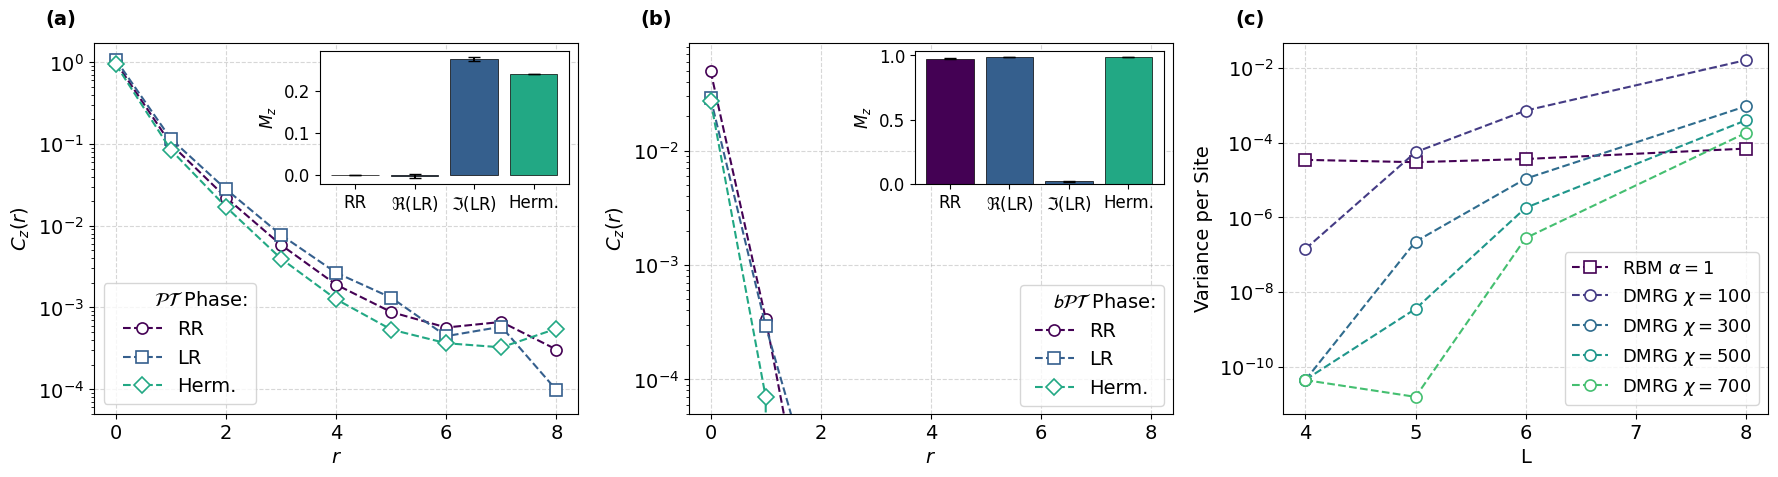

In [38]:
colors = plt.cm.viridis(np.linspace(0, 0.6, 3))
bar_width = 0.25
r_vals = np.array(r[-1])

fig, axs = plt.subplots(1, 3, figsize=(18, 5))
labels = ["(a)", "(b)", "(c)"]
labels_insert = ['RR', r'$\Re$(LR)', r'$\Im$(LR)', 'Herm.']
colors_insert = [colors[0], colors[1], colors[1], colors[2]]

which = 0
ax = axs[0]

ax.plot(r[-1], cc_r_all[-1][which], 'o', markersize=8,
        mfc='white', mec=colors[0], mew=1.2, linestyle='--',
        color=colors[0], label="RR")
ax.plot(r[-1], np.real(cc_r_LR_all[-1][which]), 's', markersize=8,
        mfc='white', mec=colors[1], mew=1.2, linestyle='--',
        color=colors[1], label="LR")
ax.plot(r[-1], cc_r_herm_all[-1][which], 'D', markersize=8,
        mfc='white', mec=colors[2], mew=1.2, linestyle='--',
        color=colors[2], label="Herm.")

ax.set_xlabel(r"$r$", fontsize=fontsize)
ax.set_ylabel(r"$C_z(r)$", fontsize=fontsize)
ax.set_yscale("log")
ax.set_ylim(bottom=5e-5)
ax.grid(linestyle="--", alpha=0.5)
ax.legend(loc="lower left", title=r"       $\mathcal{PT}$ Phase:",
          fontsize=fontsize, title_fontsize=fontsize)

ax.text(-0.1, 1.05, labels[0], transform=ax.transAxes,
        fontsize=fontsize, fontweight='bold')

herm_val = np.abs(M_z_herm_all[-1][which])
herm_err = M_z_herm_err_all[-1][which]
rr_val = np.abs(M_z_all[-1][which])
rr_err = M_z_err_all[-1][which]
lr_val = M_z_LR_all[-1][which]
lr_err = M_z_LR_err_all[-1][which]

bar_vals = [rr_val, lr_val.real, lr_val.imag, herm_val]
bar_errs = [rr_err, lr_err, lr_err, herm_err]

ax_inset = inset_axes(ax, width="57%", height="40%", bbox_to_anchor=(0.1, 0.35, 0.9, 0.9),
                      bbox_transform=ax.transAxes, loc='center right')

x = np.arange(4)
ax_inset.bar(x, bar_vals, yerr=bar_errs, capsize=4,
             color=colors_insert, edgecolor="black", linewidth=0.5)
ax_inset.set_xticks(x)
ax_inset.set_xticklabels(labels_insert, fontsize=fontsize-2)
ax_inset.set_ylabel(r"$M_z$", fontsize=fontsize-2)
ax_inset.tick_params(axis='y', labelsize=fontsize-2)

which = 1
ax = axs[1]

ax.plot(r[-1], cc_r_all[-1][which], 'o', markersize=8,
        mfc='white', mec=colors[0], mew=1.2, linestyle='--',
        color=colors[0], label="RR")
ax.plot(r[-1], np.abs(np.real(cc_r_LR_all[-1][which])), 's', markersize=8,
        mfc='white', mec=colors[1], mew=1.2, linestyle='--',
        color=colors[1], label="LR")
ax.plot(r[-1], cc_r_herm_all[-1][which], 'D', markersize=8,
        mfc='white', mec=colors[2], mew=1.2, linestyle='--',
        color=colors[2], label="Herm.")

ax.set_xlabel(r"$r$", fontsize=fontsize)
ax.set_ylabel(r"$C_z(r)$", fontsize=fontsize)
ax.set_yscale("log")
ax.set_ylim(bottom=5e-5)
ax.grid(linestyle="--", alpha=0.5)
ax.legend(loc="center right", bbox_to_anchor=(1, 0.185),
          title=r"    $\mathcal{bPT}$ Phase:",
          fontsize=fontsize, title_fontsize=fontsize)

ax.text(-0.1, 1.05, labels[1], transform=ax.transAxes,
        fontsize=fontsize, fontweight='bold')

herm_val = np.abs(M_z_herm_all[-1][which])
herm_err = M_z_herm_err_all[-1][which]
rr_val = np.abs(M_z_all[-1][which])
rr_err = M_z_err_all[-1][which]
lr_val = M_z_LR_all[-1][which]
lr_err = M_z_LR_err_all[-1][which]

bar_vals = [rr_val, lr_val.real, lr_val.imag, herm_val]
bar_errs = [rr_err, lr_err, lr_err, herm_err]

ax_inset = inset_axes(ax, width="57%", height="40%", bbox_to_anchor=(0.1, 0.35, 0.9, 0.9),
                      bbox_transform=ax.transAxes, loc='center right')

x = np.arange(4)
ax_inset.bar(x, bar_vals, yerr=bar_errs, capsize=4,
             color=colors_insert, edgecolor="black", linewidth=0.5)
ax_inset.set_xticks(x)
ax_inset.set_xticklabels(labels_insert, fontsize=fontsize-2)
ax_inset.set_ylabel(r"$M_z$", fontsize=fontsize-2)
ax_inset.tick_params(axis='y', labelsize=fontsize-2)

ax = axs[2]

data = [np.abs(V_NQS) / (Ls ** n_dim), 
        np.abs(V_DRMG_100) / (Ls ** n_dim), 
        np.abs(V_DRMG_300) / (Ls ** n_dim),
        np.abs(V_DRMG_500) / (Ls ** n_dim), 
        np.abs(V_DRMG_700) / (Ls ** n_dim)]
x = [Ls, Ls, Ls, Ls, Ls]
labels_lines = [r"RBM $\alpha = 1$", r"DMRG $\chi = 100$", r"DMRG $\chi = 300$", r"DMRG $\chi = 500$", r"DMRG $\chi = 700$"]
colors_plot = plt.cm.viridis(np.linspace(0, 0.7, len(data)))
markers = ["s", "o", "o", "o", "o", "o"]


for i in range(len(data)):
    ax.plot(x[i], data[i], label=labels_lines[i], linestyle="--", marker=markers[i], markersize=8,
            mfc='white', mec=colors_plot[i], mew=1.2, color=colors_plot[i])

ax.set_yscale("log")
ax.set_ylabel("Variance per Site", fontsize=fontsize)
ax.set_xlabel("L", fontsize=fontsize)
ax.legend(fontsize=fontsize-1)
ax.grid(alpha=0.5, linestyle="--")
ax.set_xticks(np.linspace(min(Ls), max(Ls), len(Ls) + 1))

ax.text(-0.1, 1.05, labels[2], transform=ax.transAxes,
        fontsize=fontsize, fontweight='bold')

plt.tight_layout()
plt.savefig("Figures/CC_and_DMRG.pdf")
plt.show()

# Spectral Gap

In [39]:
def take_data(file_name):

    df = pd.read_csv(file_name)

    ks = df['ks'].to_numpy()
    hs = df['hs'].to_numpy()
    E_ED = df['E_ED'].to_numpy()
    E_ED = np.array(E_ED, dtype=complex)
    E_nk = df['E_nk'].to_numpy()
    E_nk = np.array(E_nk, dtype=complex)
    E_exact = df['E_exact'].to_numpy()
    E_exact = np.array(E_exact, dtype=complex)
    F_exact = df['F_exact'].to_numpy()
    F_exact = np.array(F_exact, dtype=complex)
    F_nk = df['F_nk'].to_numpy()
    F_nk = np.array(F_nk, dtype=complex)

    mask = (E_ED.imag * E_nk.imag < 0)
    E_ED = np.where(mask, E_ED.conj(), E_ED)

    mask = (E_exact.imag * E_ED.imag < 0)
    E_exact = np.where(mask, E_exact.conj(), E_exact)

    relative_error_nk = np.abs(E_ED - E_nk) / np.abs(E_ED)
    relative_error_exact = np.abs(E_ED - E_exact) / np.abs(E_ED)

    sort_indices = np.lexsort((ks, hs)) 

    ks = ks[sort_indices]
    hs = hs[sort_indices]
    E_ED = E_ED[sort_indices]
    E_nk = E_nk[sort_indices]
    E_exact = E_exact[sort_indices]
    F_exact = F_exact[sort_indices]
    F_nk = F_nk[sort_indices]

    mask = (E_ED.imag * E_nk.imag < 0)
    E_ED = np.where(mask, E_ED.conj(), E_ED)

    mask = (E_exact.imag * E_ED.imag < 0)
    E_exact = np.where(mask, E_exact.conj(), E_exact)

    relative_error_nk = np.abs(E_ED - E_nk) / np.abs(E_ED)
    relative_error_exact = np.abs(E_ED - E_exact) / np.abs(E_ED)

    return relative_error_nk, relative_error_exact, ks, hs

def take_stats(data):
    return np.mean(data), np.median(data), np.std(data)

In [40]:
lam = 0.5
L = 9

file_name = "../Data/phase_diagram/lam_" + str(lam) + "_L_" + str(9) + ".csv"
df = pd.read_csv(file_name)

ks_all = df['k'].unique()
hs_all = df['h'].unique()
E_all = df.pivot(index = 'h', columns = 'k', values = 'E').values

folder = f"../Data/fixed_points_test/cRBM_lam_{lam}_L_{L}"

re_nk_SC, re_exact_SC, ks, hs = take_data(folder + "_AllSR_4000_z.csv")
re_nk_par, re_exact_par, _, _ = take_data(folder + "_AllSR_par_4000.csv")
re_nk_CC, re_exact_CC, _, _ = take_data(folder + "_CC_4000.csv")

re_nk_SC_mean, re_nk_SC_mean, re_nk_SC_std = take_stats(re_nk_SC)
re_nk_CC_mean, re_nk_CC_mean, re_nk_CC_std = take_stats(re_nk_CC)
re_nk_par_mean, re_nk_par_mean, re_nk_par_std = take_stats(re_nk_par)

re_exact_SC_mean, re_exact_SC_mean, re_exact_SC_std = take_stats(re_exact_SC)
re_exact_CC_mean, re_exact_CC_mean, re_exact_CC_std = take_stats(re_exact_CC)
re_exact_par_mean, re_exact_par_mean, re_exact_par_std = take_stats(re_exact_par)

re_nk_SC_grid = re_nk_SC.reshape((11, 11))
re_nk_CC_grid = re_nk_CC.reshape((11, 11))
re_nk_par_grid = re_nk_par.reshape((11, 11))

re_exact_SC_grid = re_exact_SC.reshape((11, 11))
re_exact_CC_grid = re_exact_CC.reshape((11, 11))
re_exact_par_grid = re_exact_par.reshape((11, 11))

In [41]:
df = pd.read_csv(folder + "_CC_4000.csv")

ks = df['ks'].to_numpy()
hs = df['hs'].to_numpy()
E_nk = df['E_nk'].to_numpy()
E_nk = np.array(E_nk, dtype=complex)


sort_indices = np.lexsort((ks, hs)) 

ks_grid = ks[sort_indices]
hs_grid = hs[sort_indices]
E_nk = E_nk[sort_indices]

In [42]:
df = pd.read_csv("../Data/Spectral_gap.csv")
ks = df["ks"].to_numpy()
Ls = [6,8,10,12,14,16]
distances = []

for L in Ls:
    distances.append(df[f"L={L}"].to_numpy())
    

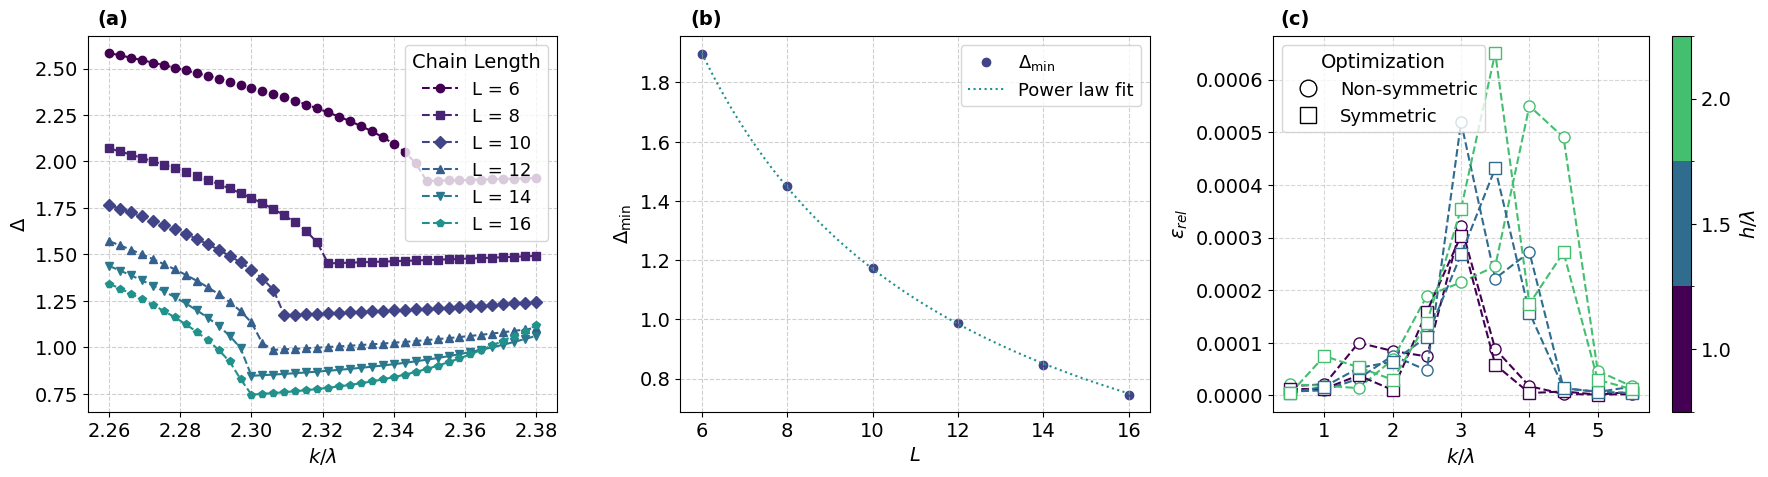

In [43]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit
import numpy as np


plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)

colors = plt.cm.viridis(np.linspace(0, 0.5, len(Ls)))
markers = ['o', 's', 'D', '^', 'v', 'p']

for i, d in enumerate(distances):
    plt.plot(ks / 0.5, d, linestyle="--", label=f"L = {Ls[i]}", color=colors[i], marker=markers[i])

plt.xlabel(r"$k/\lambda$", fontsize=fontsize)
plt.ylabel(r"$\Delta$", fontsize=fontsize)
plt.legend(title="Chain Length", fontsize=fontsize - 1, title_fontsize=fontsize, loc="upper right")
plt.grid(linestyle="--", alpha=0.6)
plt.text(0.02, 1.07, "(a)", transform=plt.gca().transAxes, fontsize=fontsize, fontweight='bold', va='top')

plt.subplot(1, 3, 2)

mins = [np.min(d) for d in distances]

def power(x, a, b):
    return a * x ** b

params, covariance = curve_fit(power, Ls, mins, p0=[9.49101855, -0.90647507])
x = np.linspace(Ls[0], Ls[-1], 100)

plt.scatter(Ls, mins, marker="o", color=colors[-4], label=r"$\Delta_{\min}$")
plt.plot(x, power(x, *params), linestyle=":", color=colors[-1], label="Power law fit")
plt.xlabel(r"$L$", fontsize=fontsize)
plt.ylabel(r"$\Delta_{\min}$", fontsize=fontsize)
plt.grid(linestyle="--", alpha=0.6)
plt.legend(fontsize=fontsize - 1)
plt.text(0.02, 1.07, "(b)", transform=plt.gca().transAxes, fontsize=fontsize, fontweight='bold', va='top')

ax = plt.subplot(1, 3, 3)

all_data = [re_nk_SC_grid, re_nk_CC_grid]
selected_idx = [1, 2, 3]
selected_hs = hs_grid.reshape((11, 11))[selected_idx, 0] / 0.5
markers = ["o", "s"]
labels = ["Non-symmetric", "Symmetric"]

colors_c = plt.cm.viridis(np.linspace(0, 0.7, len(selected_idx)))
cmap = ListedColormap(colors_c)
bounds = np.arange(len(selected_idx) + 1) - 0.5
norm = BoundaryNorm(bounds, cmap.N)

for i in range(len(all_data)):
    for j, idx in enumerate(selected_idx):
        ax.plot(
            ks_grid.reshape((11, 11))[0, :] / 0.5,
            all_data[i][:, idx],
            marker=markers[i],
            linestyle="--",
            color=colors_c[j],
            markerfacecolor='white',
            markeredgecolor=colors_c[j],
            markersize=8,
            label=None
        )

sm = ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ticks=np.arange(len(selected_hs)), ax=ax)
cbar.ax.set_yticklabels([f"{val:.1f}" for val in selected_hs])
cbar.set_label(r"$h/\lambda$", fontsize=fontsize)

legend_elements = [
    Line2D([0], [0],
           marker=markers[i],
           linestyle="None",
           color='black',
           markerfacecolor='white',
           markeredgecolor='black',
           markersize=12,
           label=labels[i])
    for i in range(len(markers))
]
ax.legend(handles=legend_elements, fontsize=fontsize - 1, loc="upper left", title="Optimization", title_fontsize=fontsize)

ax.set_ylabel(r"$\epsilon_{rel}$", fontsize=fontsize)
ax.set_xlabel(r"$k/\lambda$", fontsize=fontsize)
ax.grid(ls="--", alpha=0.5)
ax.text(0.02, 1.07, "(c)", transform=ax.transAxes, fontsize=fontsize, fontweight='bold', va='top')

plt.tight_layout()
plt.savefig("Figures/combined_figure.pdf", bbox_inches='tight')
plt.show()


# Expressive + Opt + SR

In [44]:
E_histories = []
E_histories_err = []
var_histories = []
var_histories_err = [] 
optimizers = ["SR", "Adam"]
L = 10
M = 5000
N = 1000
arch = "cRBM"
lam = 0.5
h = 1.5 
k = 2.5

for i in range(len(optimizers)):

    file_name = f"../Data/optimizer/CC_{arch}_lam_{lam}_h_{h}_{k}_M_{M}_N_{N}_{optimizers[i]}.csv"
    df = pd.read_csv(file_name)

    E_histories.append(df["E"].to_numpy(dtype=complex))
    E_histories_err.append(df["E_err"].to_numpy(dtype=complex))
    var_histories.append(df["var"].to_numpy(dtype=complex))
    var_histories_err.append(df["var_err"].to_numpy(dtype=complex))

E_histories = np.array(E_histories)
E_histories_err = np.array(E_histories_err)
var_histories = np.array(var_histories)
var_histories_err = np.array(var_histories_err)

In [45]:
df = pd.read_csv("../Data/SR_variance/SR.csv")
Es_NH = df["Es_NH"].to_numpy()
Es_H = df["Es_H"].to_numpy()
fidelity_GS_NH = df["fidelity_GS_NH"].to_numpy()
fidelity_GS_H = df["fidelity_GS_H"].to_numpy()

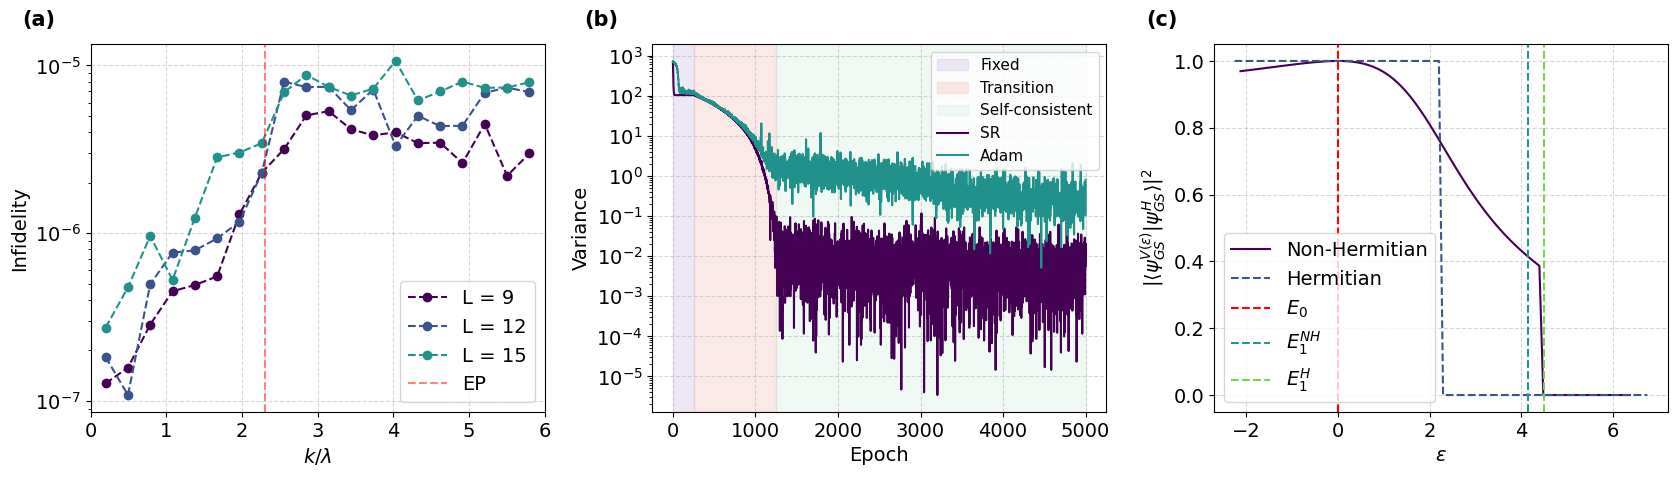

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fontsize = 14
Ls = [9, 12, 15]
colors_inf = plt.cm.viridis(np.linspace(0, 0.5, len(Ls)))
colors_opt = plt.cm.viridis(np.linspace(0, 1, len(optimizers) + 1))
colors_fid = plt.cm.viridis(np.linspace(0, 0.5, 2))

fig, axes = plt.subplots(1, 3, figsize=(17, 5))

ax_a = axes[0]
for i, L in enumerate(Ls):
    file_name = f"../Data/infidelity/new/cRBM_lam_0.5_L_{L}_.csv"
    df = pd.read_csv(file_name)
    ks = df['ks'].to_numpy(dtype=float) / 0.5
    inf = df['Infidelity'].to_numpy(dtype=float)
    sorted_idx = np.argsort(ks)
    ax_a.plot(ks[sorted_idx], inf[sorted_idx], linestyle="--", marker="o", label=f"L = {L}", color=colors_inf[i])

ep_x = 1.15 / 0.5
ax_a.axvline(ep_x, color="red", linestyle="--", label="EP", alpha=0.5)
ax_a.set_yscale("log")
ax_a.set_xlim(0, 3 / 0.5)
ax_a.set_xlabel(r"$k/\lambda$", fontsize=fontsize)
ax_a.set_ylabel("Infidelity", fontsize=fontsize)
ax_a.legend(loc="lower right", fontsize=fontsize)
ax_a.grid(linestyle="--", alpha=0.5)
ax_a.text(-0.15, 1.05, "(a)", transform=ax_a.transAxes, fontsize=fontsize + 1, fontweight="bold")

ax_b = axes[1]
M = len(E_histories[0])
x = np.arange(M)
phase1_end = int(0.05 * M)
phase2_end = int(0.25 * M)
ax_b.axvspan(0, phase1_end, color="#c9b6e4", alpha=0.3, label="Fixed")
ax_b.axvspan(phase1_end, phase2_end, color="#f5b7b1", alpha=0.3, label="Transition")
ax_b.axvspan(phase2_end, M, color="#b7e4c7", alpha=0.2, label="Self-consistent")
for i, opt in enumerate(optimizers):
    ax_b.plot(x, np.abs(var_histories[i]), label=opt, color=colors_opt[i])
ax_b.set_yscale("log")
ax_b.set_xlabel("Epoch", fontsize=fontsize)
ax_b.set_ylabel("Variance", fontsize=fontsize)
ax_b.legend(fontsize=11, loc="upper right")
ax_b.grid(True, linestyle="--", alpha=0.5)
ax_b.text(-0.15, 1.05, "(b)", transform=ax_b.transAxes, fontsize=fontsize + 1, fontweight="bold")

ax_c = axes[2]
colors_fid = plt.cm.viridis(np.linspace(0, 0.8, 4))

E0_NH = -27.03701892415525
E0_H = -27.72774625056873
E1_NH_shifted = -22.791632743109847 - E0_NH - 0.1
E1_H_shifted = -23.227746210875104 - E0_H

Es_NH_shifted = np.array(Es_NH) - E0_NH
Es_H_shifted = np.array(Es_H) - E0_H

ax_c.plot(Es_NH_shifted, fidelity_GS_NH, label=r'Non-Hermitian', color=colors_fid[0])
ax_c.plot(Es_H_shifted, fidelity_GS_H, label=r'Hermitian', color=colors_fid[1], linestyle="--")

ax_c.set_xlabel(r"$\varepsilon$", fontsize=fontsize)
ax_c.set_ylabel(r"$|\langle \psi_{GS}^{V(\varepsilon)} | \psi_{GS}^H\rangle|^2$", fontsize=fontsize)
ax_c.grid(linestyle="--", alpha=0.5)

ax_c.axvline(0, color="red", linestyle="--", label=r"$E_0$")
ax_c.axvline(E1_NH_shifted, color=colors_fid[2], linestyle="--", label=r"$E_1^{NH}$")
ax_c.axvline(E1_H_shifted, color=colors_fid[3], linestyle="--", label=r"$E_1^{H}$")

ax_c.legend(fontsize=fontsize, loc="lower left")
ax_c.text(-0.15, 1.05, "(c)", transform=ax_c.transAxes, fontsize=fontsize + 1, fontweight="bold")

plt.tight_layout()
plt.savefig("Figures/opt_expressive_sr.pdf", bbox_inches="tight")
plt.show()

# Fidelity + Magnetization


In [47]:
df = pd.read_csv("../Data/Fidelity_scaling/fvsk.csv")
Ls_all = [6, 8, 10, 12]
ks_all = df["k"].to_numpy()
fidelities_all = []
for L in Ls_all:
    fidelities_all.append(df[f"L={L}"].to_numpy())

df = pd.read_csv("../Data/Fidelity_scaling/fvsL.csv")
ks = [0.25, 0.75, 1.1565656565656566, 1.75, 2.75]
Ls = df["L"].to_numpy()
fidelities = []
for k in ks:
    fidelities.append(df[f"k={k}"].to_numpy())

ks = np.array(ks) / 0.5
ks_all = np.array(ks_all) / 0.5
k_EP = 1.1565656565656566 / 0.5

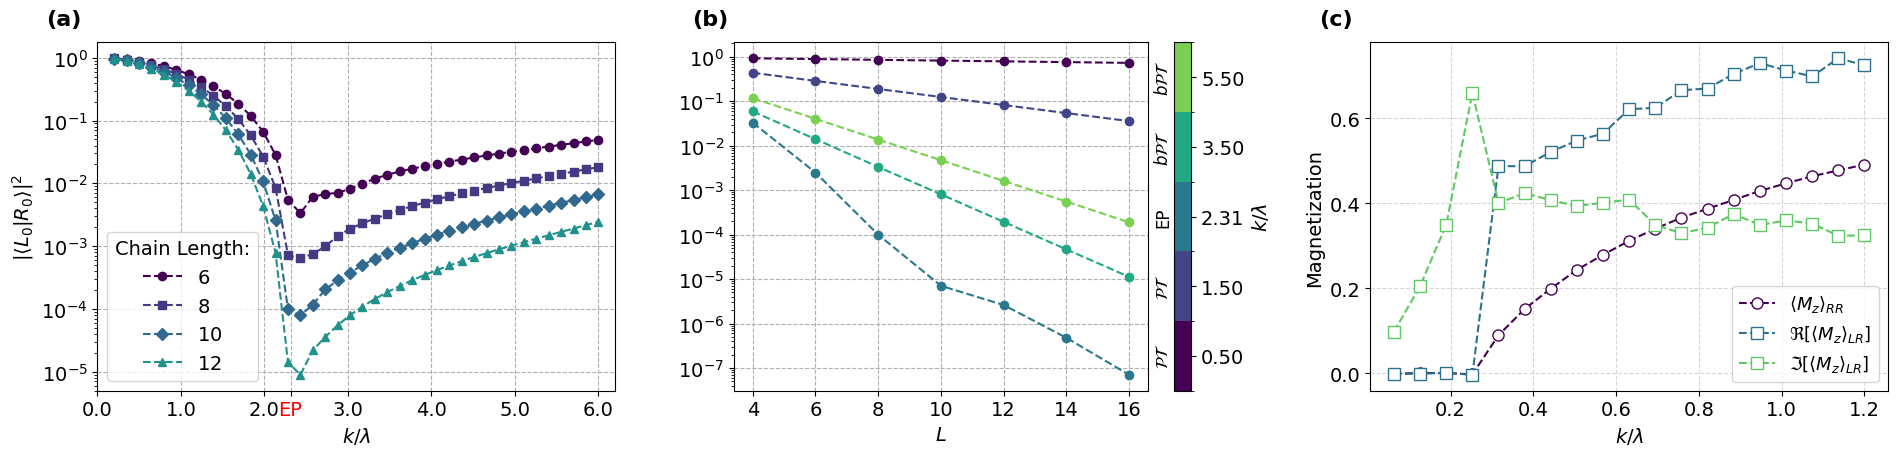

In [48]:
fig, axes = plt.subplots(1, 3, figsize=(6.4*3, 4.8))  
ax1, ax2, ax3 = axes

colors = plt.cm.viridis(np.linspace(0, 0.5, len(Ls_all)))
markers = ['o', 's', 'D', '^', 'v']

for i, fid in enumerate(fidelities_all):
    ax1.plot(ks_all, fid, label=f"${Ls_all[i]}$", color=colors[i], linestyle="--", 
             marker=markers[i % len(markers)], markersize=6)

xticks = list(ax1.get_xticks())
if k_EP not in xticks:
    xticks.append(k_EP)
    xticks.sort()
xticklabels = [r"EP" if tick == k_EP else f"{tick:.1f}" for tick in xticks]
ax1.set_xticks(xticks)
ax1.set_xticklabels(xticklabels)
for label, tick in zip(ax1.get_xticklabels(), xticks):
    if tick == k_EP:    
        label.set_color("red")

ax1.legend(title="Chain Length:", fontsize=fontsize, loc="best", title_fontsize=fontsize)
ax1.set_xlabel(r"$k/\lambda$", fontsize=fontsize)
ax1.set_ylabel(r"$|\langle L_0 | R_0 \rangle|^2$", fontsize=fontsize)
ax1.set_yscale("log")
ax1.grid(linestyle="--")
ax1.set_xlim(0, 3.1 / 0.5)
ax1.text(-0.1, 1.05, "(a)", transform=ax1.transAxes, fontsize=fontsize+2, fontweight="bold")

cmap = plt.cm.viridis
colors_b = cmap(np.linspace(0, 0.8, len(ks)))  

for i, f in enumerate(fidelities):
    ax2.plot(Ls, f, linestyle="--", color=colors_b[i], marker="o")

cmap_discrete = ListedColormap(colors_b)
boundaries = np.linspace(min(ks), max(ks), len(ks) + 1)
norm_discrete = BoundaryNorm(boundaries, cmap_discrete.N)
tick_positions = (boundaries[:-1] + boundaries[1:]) / 2  

sm = plt.cm.ScalarMappable(cmap=cmap_discrete, norm=norm_discrete)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax2, ticks=tick_positions)
cbar.set_label(r"$k/\lambda$", fontsize=fontsize)
cbar.set_ticklabels([f"{k:.2f}" for k in ks])  

phase_labels = [r"$\mathcal{PT}$", r"$\mathcal{PT}$", "EP", r"$b\mathcal{PT}$", r"$b\mathcal{PT}$"]
for pos, label in zip(tick_positions, phase_labels):
    cbar.ax.text(-0.1, pos, label, transform=cbar.ax.transData, fontsize=12, 
                 va="center", ha="right", rotation=90, color="black")

ax2.set_xlabel(r"$L$", fontsize=fontsize)
ax2.set_yscale("log")
ax2.grid(linestyle="--")
ax2.text(-0.1, 1.05, "(b)", transform=ax2.transAxes, fontsize=fontsize+2, fontweight="bold")

plot_magnetization_components(ax3, ks_rescaled, M_z_estimate, M_z_LR_estimate, which=0, fontsize=fontsize)
ax3.text(-0.1, 1.05, "(c)", transform=ax3.transAxes, fontsize=fontsize+2, fontweight="bold")

plt.tight_layout()
plt.savefig("Figures/fidelity_scaling_mag.pdf")
plt.show()